In [75]:
import torch
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from collections import Counter

In [76]:
df = pd.read_csv('/Users/hayat/Downloads/data.csv')

In [77]:
df.head()
df_original = df

In [78]:
print('The name of all the columns and corresponding datatypes: \n')
for col_name in df.columns:
    d_type = df.dtypes[col_name]
    print(col_name,d_type)

The name of all the columns and corresponding datatypes: 

Year int64
Month object
MobileWeb_or_Web object
Type_of_Customers? object
Where_Are_They_comming_from? object
Which_Place_in_India? object
How_many_Landed_on_our_Page? float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button? float64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form? int64
How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form? int64


In [79]:
print('The columns having missing values: \n')
[col for col in df.columns if df[col].isnull().any()]

The columns having missing values: 



['How_many_Landed_on_our_Page?',
 'How_many_Landed_on_the_our_Page_and_clicked_on_a_button?']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Year                                                                                                                       2160 non-null   int64  
 1   Month                                                                                                                      2160 non-null   object 
 2   MobileWeb_or_Web                                                                                                           2160 non-null   object 
 3   Type_of_Customers?                                                                                                         2160 

In [81]:
df.describe()

,Year,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
count,2160.000000,1.080000e+03,1.080000e+03,2.160000e+03,2.160000e+03
mean,2020.000000,7.844949e+05,3.584563e+05,1.510725e+05,5.922129e+04
std,0.816686,1.232518e+06,4.981331e+05,2.353538e+05,8.646564e+04
min,2019.000000,2.456700e+04,8.425000e+03,3.761000e+03,7.660000e+02
25%,2019.000000,1.406165e+05,8.060375e+04,3.360800e+04,1.157725e+04
50%,2020.000000,3.818205e+05,1.731775e+05,7.064950e+04,2.700450e+04
75%,2021.000000,8.196922e+05,3.948560e+05,1.659590e+05,7.185350e+04
max,2021.000000,1.127413e+07,4.079301e+06,3.022858e+06,1.251258e+06


In [82]:
df

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?
0,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,NaN,NaN,56892,17178
1,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,NaN,NaN,41460,11916
2,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,NaN,NaN,55561,19461
3,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Indore,NaN,NaN,320923,110667
4,2019,Jan,Desktop_Website,Existing_Customer,Came_From_Google,Pune,NaN,NaN,220937,46033
...,...,...,...,...,...,...,...,...,...,...
2155,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Bangalore,67299.0,21255.0,6984,1882
2156,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Chennai,430294.0,156510.0,46676,16703
2157,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Dehradun,48713.0,27770.0,7515,2089
2158,2021,Dec,Mobile_website,New_Customer,Unidentified_Sources,Indore,593021.0,310836.0,161575,78465


In [83]:
count1 = len(df[(df['Which_Place_in_India?']=='Pune') & (df['Type_of_Customers?']=='New_Customer')&(df['Where_Are_They_comming_from?']=='LinkedIn')])
count2 = len(df[(df['Which_Place_in_India?']=='Pune') & (df['Type_of_Customers?']=='New_Customer')])

In [84]:
print('The unique platfroms where customers are coming from: \n')
df['Where_Are_They_comming_from?'].unique()

The unique platfroms where customers are coming from: 



array(['Came_From_Google', 'Landed_on_the_page_Directly',
       'Unidentified_Sources'], dtype=object)

In [85]:
print('The number of new customers who are from Pune and came from LinkedIn: ',count1)
print('The number of new customers who are from Pune : ',count2)

The number of new customers who are from Pune and came from LinkedIn:  0
The number of new customers who are from Pune :  216


In [86]:
print('Looking at data I believe the owner of this data can be any medium - big national level organistion.')
print('As the data is coming only from the major cities in india we can infer that the company operates only in specific regions in INDIA.')
print('Around the new year there is huge spike in customers so the organsition would be pretty busy during this period as compared to the rest of the year.')

Looking at data I believe the owner of this data can be any medium - big national level organistion.
As the data is coming only from the major cities in india we can infer that the company operates only in specific regions in INDIA.
Around the new year there is huge spike in customers so the organsition would be pretty busy during this period as compared to the rest of the year.


In [87]:
count1 = len(df[(df['Which_Place_in_India?']=='Pune') & (df['Type_of_Customers?']=='New_Customer')&(df['Where_Are_They_comming_from?']=='LinkedIn')])

In [88]:
def data_cleaning(df):
    df['inc/dec_percentage']=(df['How_many_Landed_on_our_Page?']-df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'])*100/df['How_many_Landed_on_our_Page?']
    for col in df.columns:
        if df[col].isnull().any():
            df[col].fillna((df[col].mean()), inplace=True)
    df = df.apply(lambda x: x.replace({'Jan':'january', 'Feb':'february', 'Mar':'march', 'Apr':'april','May':'may','Jun':'june', 'Jul':'july', 'Aug':'august', 'Sep':'september',
       'Oct':'october', 'Nov':'november', 'Dec':'december'}, regex=True))
    df = df.apply(lambda x: x.replace({'Came_From_LinkedIn':'From LinkedIn', }, regex=True))
    return df

In [89]:
data_cleaning(df).head(30)

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,inc/dec_percentage
0,2019,january,Desktop_Website,Existing_Customer,Came_From_Google,Bangalore,7.844949e+05,358456.263889,56892,17178,85.890563
1,2019,january,Desktop_Website,Existing_Customer,Came_From_Google,Chennai,7.844949e+05,358456.263889,41460,11916,85.890563
2,2019,january,Desktop_Website,Existing_Customer,Came_From_Google,Dehradun,7.844949e+05,358456.263889,55561,19461,85.890563
3,2019,january,Desktop_Website,Existing_Customer,Came_From_Google,Indore,7.844949e+05,358456.263889,320923,110667,85.890563
4,2019,january,Desktop_Website,Existing_Customer,Came_From_Google,Pune,7.844949e+05,358456.263889,220937,46033,85.890563
5,2019,january,Desktop_Website,Existing_Customer,Landed_on_the_page_Directly,Bangalore,7.844949e+05,358456.263889,90241,24229,85.890563
6,2019,january,Desktop_Website,Existing_Customer,Landed_on_the_page_Directly,Chennai,7.844949e+05,358456.263889,77630,18502,85.890563
7,2019,january,Desktop_Website,Existing_Customer,Landed_on_the_page_Directly,Dehradun,7.844949e+05,358456.263889,91479,24363,85.890563
8,2019,january,Desktop_Website,Existing_Customer,Landed_on_the_page_Directly,Indore,7.844949e+05,358456.263889,436641,165036,85.890563
9,2019,january,Desktop_Website,Existing_Customer,Landed_on_the_page_Directly,Pune,7.844949e+05,358456.263889,531346,101317,85.890563


In [90]:
values = {"Year":2020, #the default values when the parameters are missing
"Month":'Jan',
"MobileWeb_or_Web":'Desktop_Website',
"Type_of_Customers?":'Existing_Customer',
"Where_Are_They_comming_from?":'Came_From_Google',
"Which_Place_in_India?":'Bangalore',
"How_many_Landed_on_our_Page?":1.128690e+05,
"How_many_Landed_on_the_our_Page_and_clicked_on_a_button?":91801.000000	,
"How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?": 48979,
"How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?":33382,
"inc/dec_percentage": 70.424120}
def descriptive_stats(df):
    print('Minimum values present in all the level-columns. (Level 1, 2, 3, 4) are: \n')
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number) and col!='Year': # checks for only those cols from level 1-4
            print(df[col].min()) #min
    
    l1=df[(df['Where_Are_They_comming_from?']=='Landed_on_the_page_Directly')&(df['MobileWeb_or_Web']=='Desktop_Website')]['How_many_Landed_on_our_Page?'].max()
    l2=df[(df['Where_Are_They_comming_from?']=='Landed_on_the_page_Directly')&(df['MobileWeb_or_Web']=='Desktop_Website')]['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'].max()
    print(f"\nMaximum value of “Level 2” / “Level 1” among those who came directly to the via desktop website:\n{l2 =}, \n{l1=}\n")
    
    df_new = df.fillna(value=values) # fills the missing parameters with the default values
    print('\n \t \t \t \t \t SUMMARY STATS \n\n')
    print(df_new.describe())
    print('\n\nThe unique values in non-numeric cols: \n')
    for col in df.columns:
        if  not np.issubdtype(df[col].dtype, np.number): #checks whether the col are non_numeric
            print(df[col].unique())
    return df
df = df.fillna(value=values)

In [91]:
Cities_tcustomer_2019 = {}
Cities_tcustomer_2020 = {}
Cities_tcustomer_2021 = {}
City_greatrt_150k = ''
count = 0
largest_count = 0
for city in df['Which_Place_in_India?'].unique():
    Cities_tcustomer_2019.update({city:df[(df['Year']==2019)&(df['Which_Place_in_India?']==city)]['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].sum()})
    Cities_tcustomer_2020.update({city:df[(df['Year']==2020)&(df['Which_Place_in_India?']==city)]['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].sum()})    
    Cities_tcustomer_2021.update({city:df[(df['Year']==2021)&(df['Which_Place_in_India?']==city)]['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'].sum()})
    
    count = len(df[(df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']>150000)&(df['Which_Place_in_India?']==city)])
    if count > largest_count:
        largest_count = count
        City_greatrt_150k = city
    existing_cust =len(df[(df['Type_of_Customers?']=='Existing_Customer')&(df['Which_Place_in_India?']==city)])
    print(existing_cust,'existing customers in',city)
print('\nSo all the cities have the same no of existing customers')
print('\n\nThe city having largest no of submissions(Level 4) > 150k is: ',City_greatrt_150k)


216 existing customers in Bangalore
216 existing customers in Chennai
216 existing customers in Dehradun
216 existing customers in Indore
216 existing customers in Pune

So all the cities have the same no of existing customers


The city having largest no of submissions(Level 4) > 150k is:  Indore


In [92]:
k = Counter(Cities_tcustomer_2021)
# Finding 3 highest values
high = k.most_common(3)
print("Top 3 “Place_in_India”  on the basis of column “Level 4”:")
print("City: form_submissions (2021)")
for i in high:
    print(i[0]," :",i[1]," ")
    
    
k = Counter(Cities_tcustomer_2019)
high = k.most_common(3)
print("\nTop 3 “Place_in_India”  on the basis of column “Level 4”:")
print("City: form_submissions (2019)")
for i in high:
    print(i[0]," :",i[1]," ")
    
k = Counter(Cities_tcustomer_2021)
low = k.most_common()[-3:]
print("\nBottom 3 “Place_in_India”  on the basis of column “Level 4”:")
print("City: form_submissions (2021)")
for i in low:
    print(i[0]," :",i[1]," ")
    
k = Counter(Cities_tcustomer_2020)
low = k.most_common()[-3:]
print("\nBottom 3 “Place_in_India”  on the basis of column “Level 4”:")
print("City: form_submissions (2020)")
for i in low:
    print(i[0]," :",i[1]," ")


Top 3 “Place_in_India”  on the basis of column “Level 4”:
City: form_submissions (2021)
Indore  : 15104408  
Pune  : 11208722  
Chennai  : 8211936  

Top 3 “Place_in_India”  on the basis of column “Level 4”:
City: form_submissions (2019)
Indore  : 20092071  
Pune  : 11039977  
Chennai  : 5156066  

Bottom 3 “Place_in_India”  on the basis of column “Level 4”:
City: form_submissions (2021)
Chennai  : 8211936  
Bangalore  : 3752706  
Dehradun  : 2673864  

Bottom 3 “Place_in_India”  on the basis of column “Level 4”:
City: form_submissions (2020)
Chennai  : 7836311  
Bangalore  : 3140030  
Dehradun  : 2445091  


In [93]:
df.info()
print(df.dtypes)
from sklearn.preprocessing import LabelEncoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Year                                                                                                                       2160 non-null   int64  
 1   Month                                                                                                                      2160 non-null   object 
 2   MobileWeb_or_Web                                                                                                           2160 non-null   object 
 3   Type_of_Customers?                                                                                                         2160 

In [94]:
from sklearn.preprocessing import LabelEncoder
df = data_cleaning(df) 
for col in df.columns:
    if not np.issubdtype(df[col].dtype, np.number):
        df[col] = LabelEncoder().fit_transform(df[col])
X = df.iloc[:,:6]
y = df['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?']
mi = y.min()
ma = y.max()
y = (y-mi)/(ma-mi)
# m = y.mean()
# s = y.std()
# y = (y - m)/s

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error,mean_absolute_percentage_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
clf = DecisionTreeRegressor(max_depth=5 )# Linear Kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
accuracy = clf.score(X_test, y_test)
mse=mean_squared_error(y_pred, y_test)
print('The RMSE is:',np.sqrt(mse))
# plt.plot(X_test,y_pred,linestyle='dashed',label = 'Level-1')
# plt.plot(X_test,y_test,label = 'inc/dec',label = 'Level-2')
# plt.legend()
from sklearn import tree
print('The MAPR is:',mean_absolute_percentage_error(y_pred,y_test))

The RMSE is: 0.044072635703712296
The MAPR is: 0.4603598009202543


In [96]:
df.tail()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,inc/dec_percentage
2155,2021,2,1,1,2,0,67299.0,21255.0,6984,1882,97.203525
2156,2021,2,1,1,2,1,430294.0,156510.0,46676,16703,96.118235
2157,2021,2,1,1,2,2,48713.0,27770.0,7515,2089,95.711617
2158,2021,2,1,1,2,3,593021.0,310836.0,161575,78465,86.768597
2159,2021,2,1,1,2,4,372897.0,123057.0,48802,19441,94.786496


##### print(accuracy)

In [97]:
df.head()

,Year,Month,MobileWeb_or_Web,Type_of_Customers?,Where_Are_They_comming_from?,Which_Place_in_India?,How_many_Landed_on_our_Page?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?,How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?,inc/dec_percentage
0,2019,4,0,0,0,0,784494.885185,358456.263889,56892,17178,97.810311
1,2019,4,0,0,0,1,784494.885185,358456.263889,41460,11916,98.481061
2,2019,4,0,0,0,2,784494.885185,358456.263889,55561,19461,97.519295
3,2019,4,0,0,0,3,784494.885185,358456.263889,320923,110667,85.893216
4,2019,4,0,0,0,4,784494.885185,358456.263889,220937,46033,94.132148


<Figure size 1116x252 with 0 Axes>

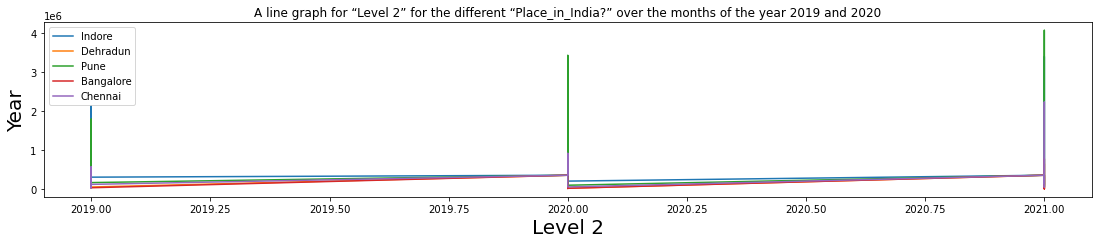

The graph for year 2019 and 2020 vs level-2 where at starting year the DRASTIC INCREASE 



In [115]:
import matplotlib.pyplot as plt
df2 = df[(df['Year']!=2019)]
plt.figure()
fig, ax = plt.subplots()
ax.set_ylabel('Level 2', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2019 and 2020')
cities = set(df2['Which_Place_in_India?'])
for city in cities:
     df2 = df[(df['Which_Place_in_India?'] == city)]
     plt.plot(df2['Year'], df2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'], label=city)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"] = [15.50, 3.50]
plt.rcParams["figure.autolayout"] = True
print('The graph for year 2019 and 2020 vs level-2 where at starting year the DRASTIC INCREASE \n')

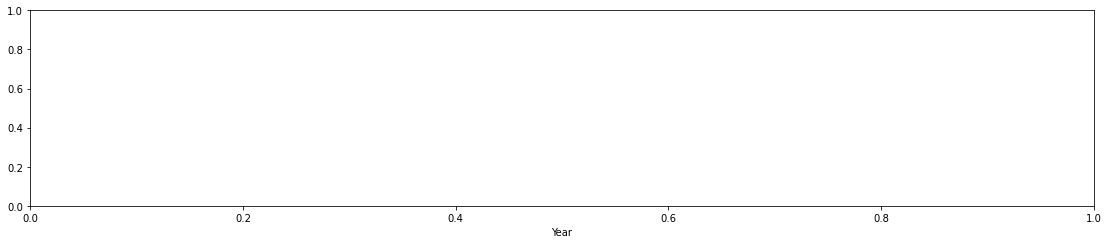

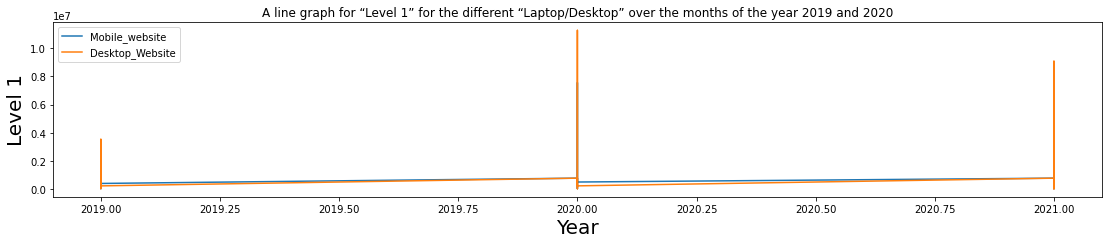

In [117]:
devices = {'Desktop_Website','Mobile_website'}
plt.xlabel('Year')
# naming the y axis
df = df_original
fig, ax = plt.subplots()
ax.set_ylabel('Level 1', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2019 and 2020')
for device in devices:
    df2 = df[(df['MobileWeb_or_Web']==device)]
    plt.plot(df2['Year'], df2['How_many_Landed_on_our_Page?'], label=device)
plt.legend()

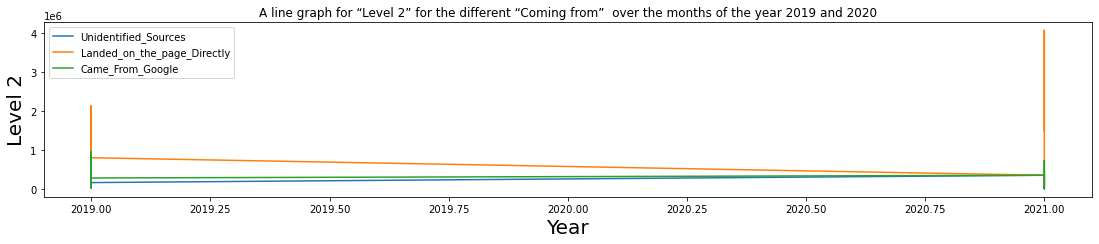

In [120]:
places = {'Came_From_Google', 'Landed_on_the_page_Directly',
       'Unidentified_Sources'}
fig, ax = plt.subplots()
ax.set_ylabel('Level 2', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 2” for the different “Coming from”  over the months of the year 2019 and 2020')
for place in places:
    df2 = df[(df['Where_Are_They_comming_from?']==place)&(df['Year']!=2020)]
    plt.plot(df2['Year'], df2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button?'], label=place)
plt.legend()

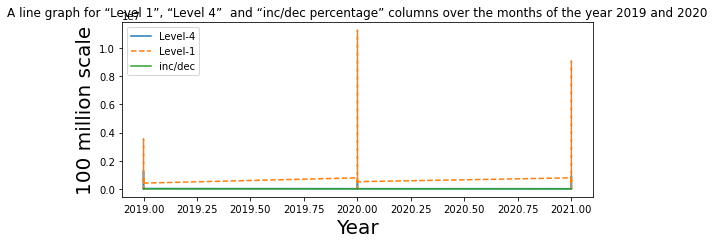

In [131]:
fig, ax = plt.subplots()
ax.set_ylabel('100 million scale', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 1”, “Level 4”  and “inc/dec percentage” columns over the months of the year 2019 and 2020')
df2 = df[(df['Year']!=2022)]
plt.plot(df2['Year'], df2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form_and_Completed_and_submited_the_form?'],label = 'Level-4')
plt.plot(df2['Year'], df2['How_many_Landed_on_our_Page?'],linestyle='dashed',label = 'Level-1')
plt.plot(df2['Year'], df2['inc/dec_percentage'],label = 'inc/dec')
plt.legend()

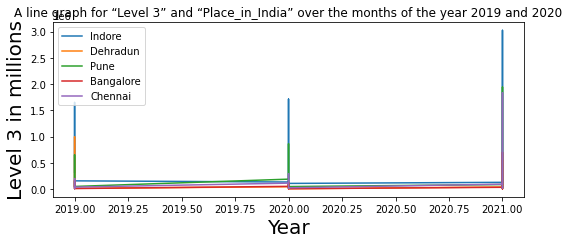

In [130]:
fig, ax = plt.subplots()
ax.set_ylabel('Level 3 in millions', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 3” and “Place_in_India” over the months of the year 2019 and 2020')
for city in cities:
     df2 = df[(df['Which_Place_in_India?'] == city)]
     plt.plot(df2['Year'], df2['How_many_Landed_on_the_our_Page_and_clicked_on_a_button_and_started_filling_the_Form?'], label=city)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

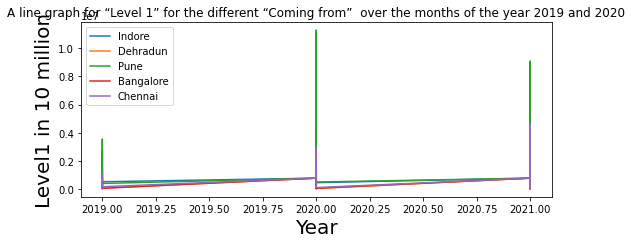

In [136]:
cities = set(df['Which_Place_in_India?'])
fig, ax = plt.subplots()
ax.set_ylabel('Level1 in 10 million', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)
plt.title('A line graph for “Level 1” for the different “Coming from”  over the months of the year 2019 and 2020')
for city in cities:
     df2 = df[(df['Which_Place_in_India?'] == city)]
     plt.plot(df2['Year'], df2['How_many_Landed_on_our_Page?'], label=city)
plt.legend()
plt.show()
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

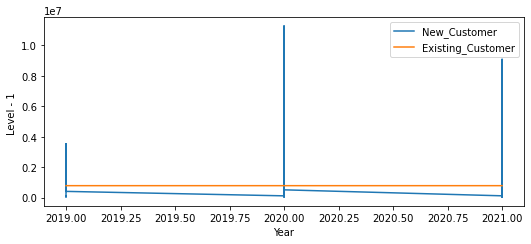

In [108]:
customers = {'Existing_Customer','New_Customer'}
for cust in customers:
    df2 = df[(df['Type_of_Customers?'] == cust)]
    plt.plot(df2['Year'], df2['How_many_Landed_on_our_Page?'], label=cust)
plt.xlabel('Year')
# naming the y axis
plt.ylabel('Level - 1 ')
plt.legend()

In [51]:
print('I analysed that the customer base for the concerned organisatioin almost follows the same trend each year for almost every level.')
print('Except that there is a drastic increase in custmores around the new year.\n')
print('In between the start and end of year the customer base constantly and gradualy decreases or increases in various levels\n')

I analysed that the customer base for the concerned organisatioin almost follows the same trend each year for almost every level.
Except that there is a drastic increase in custmores around the new year.

In between the start and end of year the customer base constantly and gradualy decreases or increases in various levels



In [94]:
print('I find my most recent project the most intersting one. You may heard of SAFFRON it is a extremely expensive flower spice,even a few grams cost thousands of bucks.Plucking this spice from the flower is quite a tiring process with my friend who is an expert in IOT we are making saffron picking machine to automate this process using COMPUTER VISION AND IOT.I am managing the whole ML part and I had to do things from scratch on my own. I collected over 1000 images captured by me by using different mobile phones having different camera quality and different contrast , hue etc I was a really tiring an task.Fortunately the data engineering part is coming to an end.') 
print('Now I am going to start to the modelling process soon.\nAs far as the codebase and the data used is concered only me and my friend have access to it. I am sorry i can’t share it.')

I find my most recent project the most intersting one. You may heard of SAFFRON it is a extremely expensive flower spice,even a few grams cost thousands of bucks.Plucking this spice from the flower is quite a tiring process with my friend who is an expert in IOT we are making saffron picking machine to automate this process using COMPUTER VISION AND IOT.I am managing the whole ML part and I had to do things from scratch on my own. I collected over 1000 images captured by me by using different mobile phones having different camera quality and different contrast , hue etc I was a really tiring an task.Fortunately the data engineering part is coming to an end.
Now I am going to start to the modelling process soon.
As far as the codebase and the data used is concered only me and my friend have access to it. I am sorry i can’t share it.


In [1]:
print('First of all i want to bring this thing to your notice that I have a vacation of almost 2 months and even without vacation i have managed previous internships while doing college so time managent is not a problem for me.In my whole day asides from work there are only 3 things of importance to me and those are:')
print('going to gym, a little bit of family time in evening and good sleep.I’m pretty focused individual and I always try to be away from distractions.I would conclude by saying working has become an addiction for me so I assure you time managing is the least of my concern.')

First of all i want to bring this thing to your notice that I have a vacation of almost 2 months and even without vacation i have managed previous internships while doing college so time managent is not a problem for me.In my whole day asides from work there are only 3 things of importance to me and those are:
going to gym, a little bit of family time in evening and good sleep.I’m pretty focused individual and I always try to be away from distractions.I would conclude by saying working has become an addiction for me so I assure you time managing is the least of my concern.
